**Introduction**

In this task, I have implemented a Decision Tree Classifier using Python.

I imported key libraries such as pandas for dataset handling, NumPy for numerical operations, and scikit-learn for building and evaluating the machine learning model.

After uploading the dataset, I performed preprocessing, split the data into training and testing sets, and trained a Decision Tree Classifier to make predictions.

In [4]:
from google.colab import files
import pandas as pd
import zipfile
import io

uploaded = files.upload()

# Get the name of the uploaded zip file
uploaded_zip_file_name = list(uploaded.keys())[0]
uploaded_zip_content = uploaded[uploaded_zip_file_name]

# Use BytesIO to handle the uploaded file content in memory
with io.BytesIO(uploaded_zip_content) as outer_zip_buffer:
    with zipfile.ZipFile(outer_zip_buffer, 'r') as outer_zip_file:
        print(f"Contents of '{uploaded_zip_file_name}': {outer_zip_file.namelist()}")

        # Try to find 'bank.zip' or 'bank-additional.zip' within the outer zip
        inner_zip_to_extract = None
        for name in outer_zip_file.namelist():
            if 'bank.zip' in name.lower() or 'bank-additional.zip' in name.lower():
                inner_zip_to_extract = name
                break

        if inner_zip_to_extract is None:
            raise ValueError(f"Could not find 'bank.zip' or 'bank-additional.zip' within '{uploaded_zip_file_name}'.")

        print(f"Extracting '{inner_zip_to_extract}' from '{uploaded_zip_file_name}'...")
        inner_zip_content = outer_zip_file.read(inner_zip_to_extract)

        # Now handle the inner zip file
        with io.BytesIO(inner_zip_content) as inner_zip_buffer:
            with zipfile.ZipFile(inner_zip_buffer, 'r') as inner_zip_file:
                print(f"Contents of the inner zip '{inner_zip_to_extract}': {inner_zip_file.namelist()}")

                # Find a CSV file within the inner zip
                csv_files_in_inner_zip = [name for name in inner_zip_file.namelist() if name.endswith('.csv')]

                if not csv_files_in_inner_zip:
                    raise ValueError(f"No CSV files found within '{inner_zip_to_extract}'.")

                # Assuming the first CSV file is the target
                csv_file_name_to_read = csv_files_in_inner_zip[0]
                print(f"Reading '{csv_file_name_to_read}' from '{inner_zip_to_extract}'...")

                with inner_zip_file.open(csv_file_name_to_read) as csv_file_handle:
                    df = pd.read_csv(csv_file_handle, sep=';')
                    print(f"Successfully loaded '{csv_file_name_to_read}' into DataFrame.")

df.head()

Saving bank+marketing.zip to bank+marketing (3).zip
Contents of 'bank+marketing (3).zip': ['bank.zip', 'bank-additional.zip']
Extracting 'bank.zip' from 'bank+marketing (3).zip'...
Contents of the inner zip 'bank.zip': ['bank-full.csv', 'bank-names.txt', 'bank.csv']
Reading 'bank-full.csv' from 'bank.zip'...
Successfully loaded 'bank-full.csv' into DataFrame.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Dataset already loaded successfully!

Accuracy: 0.8950899439693306

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.60      0.34      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564


Confusion Matrix:
 [[11596   370]
 [ 1053   545]]


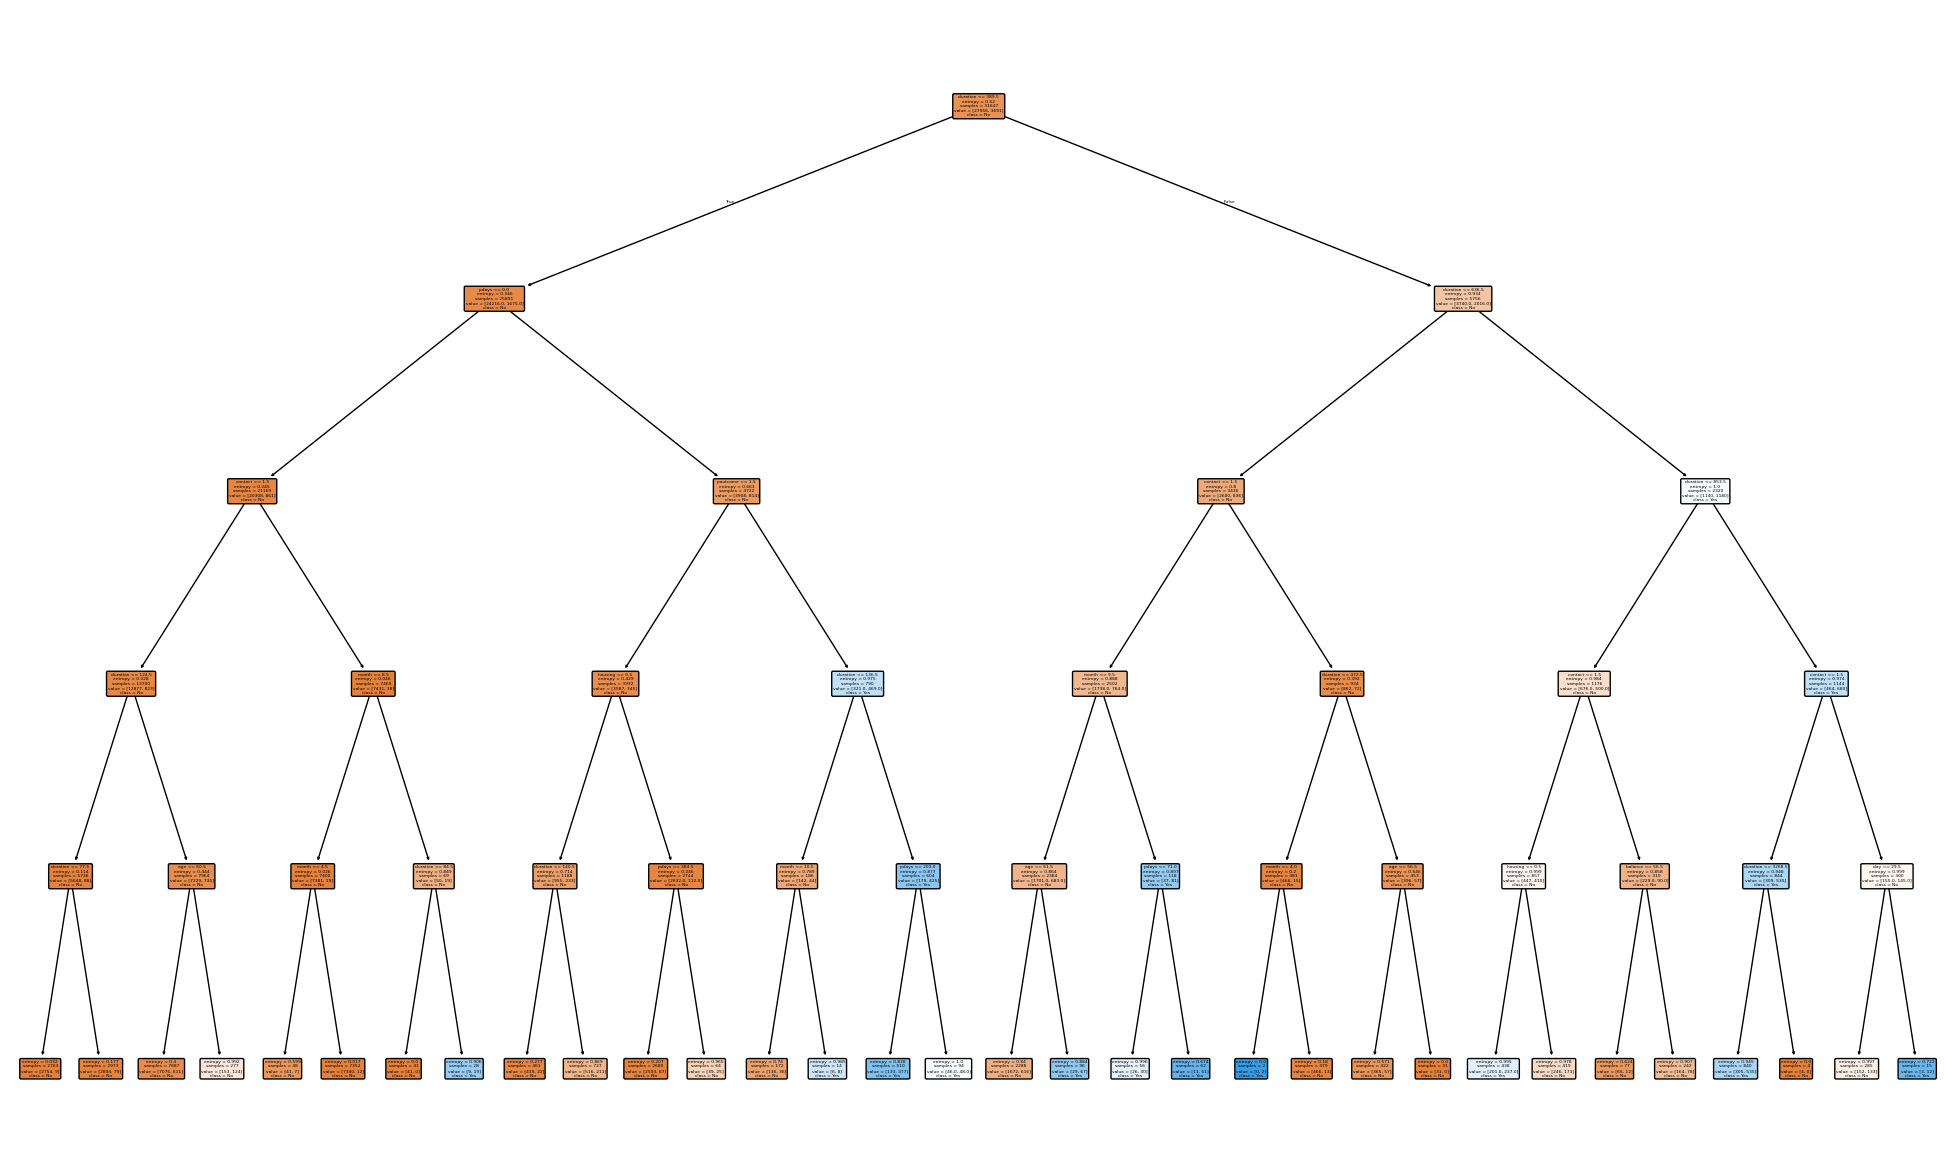

In [7]:
# 1. IMPORT LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# 2. LOAD DATASET
print("Dataset already loaded successfully!")

# 3. PREPROCESSING (Label Encoding)
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label.fit_transform(df[col])

# 4. SPLIT DATA
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. TRAIN DECISION TREE
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

# 6. PREDICTIONS
y_pred = model.predict(X_test)

# 7. EVALUATION
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. VISUALIZE DECISION TREE
plt.figure(figsize=(25, 15))
tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True
)
plt.show()

**Summary**

The Decision Tree Classifier was successfully trained and tested on the dataset. The model provided clear insights into how different features contribute to the predictions. I evaluated its performance using accuracy and a confusion matrix. The task enhanced my understanding of classification models, data preprocessing, and machine learning workflows in Python.